In [1]:
%matplotlib inline
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [2]:
print(mnist.data.shape)

(70000, 784)


In [3]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size = 1/7.0, random_state = 0
)

In [4]:
print(train_img.shape)

(60000, 784)


In [5]:
print(train_lbl.size)

60000


In [6]:
import numpy as np
import matplotlib.pyplot as plt

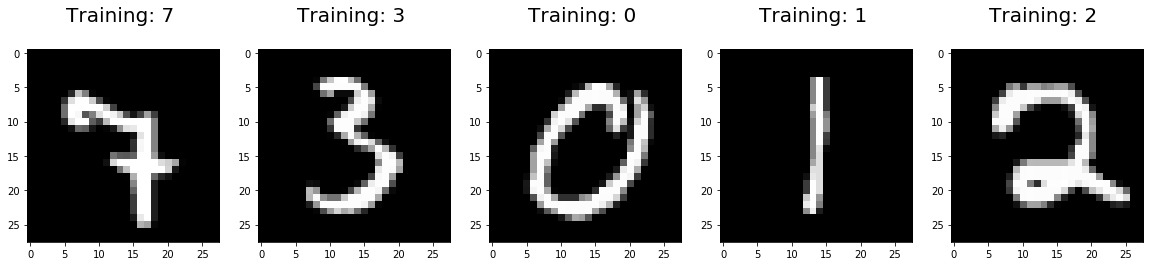

In [7]:
plt.figure(figsize=(20,4))
for index, (images, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(images, (28,28)), cmap = plt.cm.gray)
    plt.title("Training: %s \n" %label, fontsize = 20)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
logisticRegr = LogisticRegression(solver='lbfgs')

In [10]:
logisticRegr.fit(train_img, train_lbl)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
D:\Anaconda

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

In [12]:
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '4', '7', '1', '1', '7'], dtype=object)

In [13]:
predictionScore = logisticRegr.predict(test_img)

In [14]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9094


In [15]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictionScore):
    if label != predict:
        misclassifiedIndexes.append(index)
    index += 1

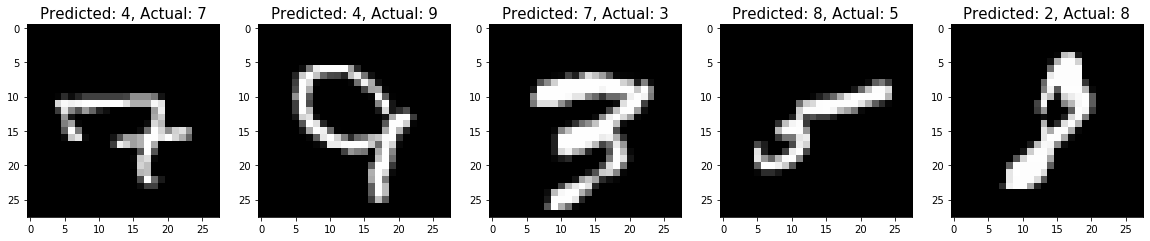

In [16]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictionScore[badIndex], test_lbl[badIndex]), fontsize = 15)

In [17]:
index2 = 0
correctclassifiedIndexes = []
for label, predict in zip(test_lbl, predictionScore):
    if label == predict:
        correctclassifiedIndexes.append(index2)
    index2 += 1

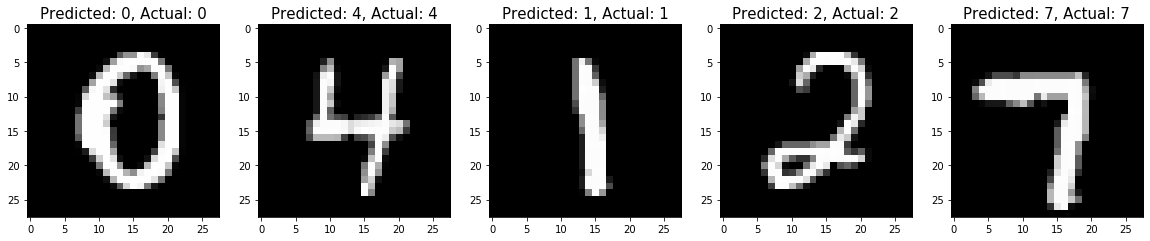

In [18]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(correctclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictionScore[badIndex], test_lbl[badIndex]), fontsize = 15)